***
## Part B questions

Now that we have familiarized ourselves with the basic setup let us test a few more stratergies as part of the assignment problem.

Consider a two-armed Bernoulli bandit scenario with true means given by $\mu_1 = \frac{1}{2}, \mu_2= \frac{1}{2}+\Delta$, for some $\Delta < \frac{1}{2}$. Let the time horizon be $T=10000$. `[20 Marks]`

In [1]:
# CODE FOR PART B1
import numpy as np

def ETC(delta,m,T): #this function takes in the value of 'delta' and 'm' which is the number of times each arm needs to be explored
# and T is the total time horizon
    mu = [0.5,0.5+delta]
    rewards_T = np.zeros(T)
    sample_mu = [0,0]

    #exploring first arm m times
    for t in range(1,m+1):
        rewards_T[t-1] = np.random.binomial(1,mu[0]) #np.random.binomial(number of trials,success probability), this line calculates rewards when arm 1 is selected
        sample_mu[0] = sample_mu[0]+(rewards_T[t-1]/m) #to calculate the sample mean of arm 1 based on m explorations

    #exploring second arm m times
    for t in range(m+1,2*m+1):
        rewards_T[t-1] = np.random.binomial(1,mu[1]) #np.random.binomial(number of trials,success probability), this line calculates rewards when arm 2 is selected
        sample_mu[1] = sample_mu[1]+(rewards_T[t-1]/m) #to calculate the sample mean of arm 2 based on m explorations

    index = np.argmax(sample_mu) # finds which arm has higher estimated sample mean reward so that we can play that arm further

    #now since we know that arm 2 has higher mu, so we play arm 2 for the remaining T-2m times
    for t in range(2*m+1,T+1):
        rewards_T[t-1] = np.random.binomial(1,mu[index]) #np.random.binomial(number of trials,success probability), this line calculates rewards when arm 2 is selected
    
    regret = mu[1]*T - np.sum(rewards_T) #computes the sample regret
    return regret

# Now, let us define a function to run multiple experiments and estimate the expected regret
def expected_regret_ETC(experiments,delta,m,T):
    total_regret = 0 # will contain the sample regrets of all number of experiments
    for i in range(experiments):
        total_regret = total_regret+ETC(delta,m,T)

    expected_regret = total_regret/experiments
    return expected_regret

# Given
experiments = 500
T = 10000
delta = 0.25
m = int(T**(2/3) * (np.log(T))**(1/3)) #as the number of times can be an integer only
print(m)

# Run 500 experiments and estimate expected regret
expected_regret = expected_regret_ETC(experiments,delta,m,T)

print(expected_regret)

972
244.932


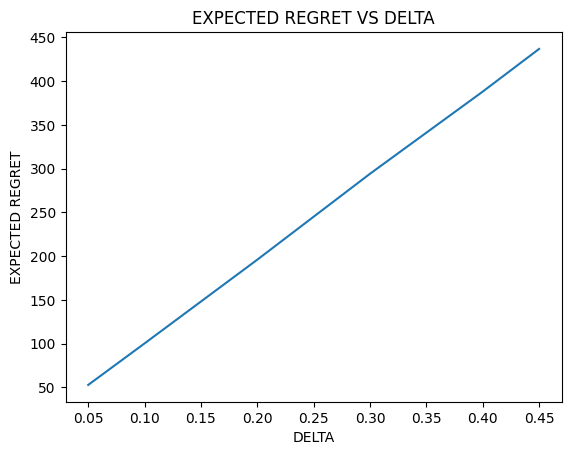

In [2]:
# CODE FOR PART B2
import matplotlib.pyplot as plt

delta = [0.05,0.1,0.2,0.3,0.4,0.45]
estimated_regret_ETC = np.zeros(6)

T=10000
m = int(T**(2/3) * (np.log(T))**(1/3)) #as the number of times can be an integer only

for i in range(1,7):
    estimated_regret_ETC[i-1] = expected_regret_ETC(500,delta[i-1],m,T)

plt.plot(delta, estimated_regret_ETC)
plt.xlabel("DELTA",fontsize=10) #to add title on X-axis
plt.ylabel("EXPECTED REGRET",fontsize=10) #to add title on Y-axis
plt.title("EXPECTED REGRET VS DELTA" ) #to add the main title to the plot
plt.show()

In [3]:
max_expected_regret = estimated_regret_ETC[5]
regret_upper_bound = T**(2/3) * (np.log(T))**(1/3)

print(max_expected_regret)
print(regret_upper_bound)

# As we can see that our max expected regret from the graph is lying below ETC's regret upper bound

436.924
972.9530713186152


In [4]:
# CODE FOR PART B3
def UCB(T, delta):

    mu = [0.5,0.5+delta]
    # Let us explore each arm once and then the arm that has higher UCB, we'll begin with that
    sample_mu = [np.random.binomial(1, mu[0]),np.random.binomial(1, mu[1])]
    pulls = [1,1] # here we are taking n(arm 1 & 2) = 1 because we are exploring each arm once and till 2 rounds the number of times 
    # each arm would have appeared will be one

    total_reward = sample_mu[0]+sample_mu[1] #to store total reward in each of the remaining T-2 turns

    for t in range(3, T + 1): # we start from 3 because we have already used 2 rounds for exploration
        arm = np.argmax(sample_mu + np.sqrt(1.5 * np.log(T) / pulls))
        reward = np.random.binomial(1, mu[arm]) # after choosing the arm with higher UCB computed from previous rounds, we use that arm in the current round
        total_reward = total_reward + reward
        pulls[arm] = pulls[arm]+1
        sample_mu[arm] = sample_mu[arm] + ((reward-sample_mu[arm])/pulls[arm])


    regret = mu[1]*T - total_reward
    return regret

# Now, let us define a function to run multiple experiments and estimate the expected regret
def expected_regret_UCB(experiments,delta,T):
    total_regret = 0 # will contain the sample regrets of all number of experiments
    for i in range(experiments):
        total_regret = total_regret+UCB(T,delta)

    expected_regret = total_regret/experiments
    return expected_regret

# Given
experiments = 500
T = 10000
delta = 0.25

# Run 500 experiments and estimate expected regret
expected_regret = expected_regret_UCB(experiments,delta,T)

print(expected_regret)

41.528


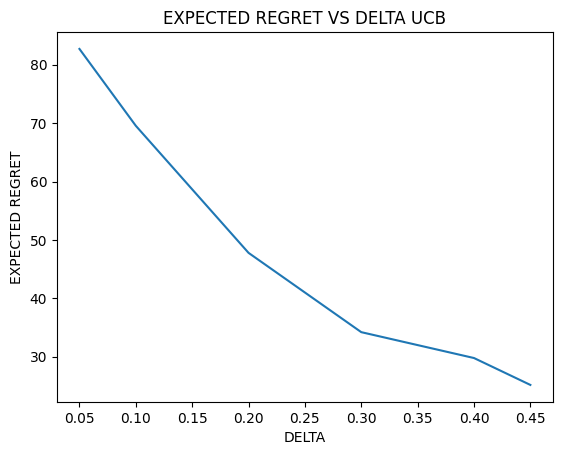

In [5]:
# Plotting

delta = [0.05,0.1,0.2,0.3,0.4,0.45]
estimated_regret_UCB = np.zeros(6)

T=10000

for i in range(1,7):
    estimated_regret_UCB[i-1] = expected_regret_UCB(500,delta[i-1],T)

plt.plot(delta, estimated_regret_UCB)
plt.xlabel("DELTA",fontsize=10) #to add title on X-axis
plt.ylabel("EXPECTED REGRET",fontsize=10) #to add title on Y-axis
plt.title("EXPECTED REGRET VS DELTA UCB" ) #to add the main title to the plot
plt.show()

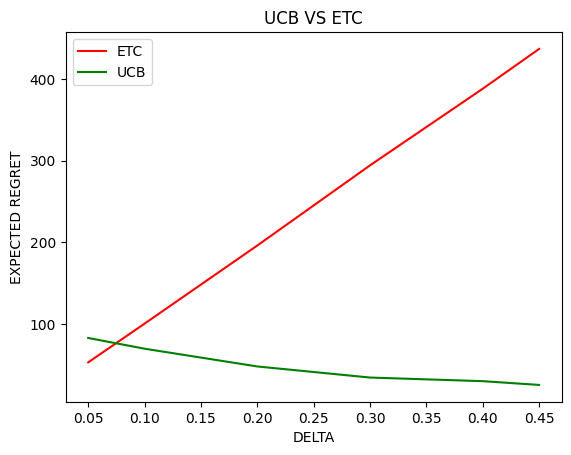

In [6]:
# Comparing the two UCB vs ETC

plt.plot(delta, estimated_regret_ETC, color='r', label='ETC') 
plt.plot(delta, estimated_regret_UCB, color='g', label='UCB') 
  
# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("DELTA") 
plt.ylabel("EXPECTED REGRET") 
plt.title("UCB VS ETC") 
  
# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show() 